## Diabetes Data Analysis with Support Vector Machine Classification

#### By Wadud Khan and Alex Dyson

---

### The Data

In 1990, __The National Institute of Diabetes and Digestive and Kidney Disease__ released a datset of a study done on a group of Pima Indians. The goal was to see what lifestyle/diagnostic factors could explain the presence of diabetes mellitus, as the group has been known to have high rate of diabetes ellitus. After a bit of digging into this datset I found out, all patients (observations) here are females atleast 21 years old of Pima Indian heritage. 
The dataset contains 769 observations and 9 variables. Here is a rundown of each variable individually:

__Pregnancies__: Number of times the individual was pregnant

__Glucose__: Glucose concentration through an oral glucose test

__Blood Pressure__: The individuals blood pressure

__Skin Thickness__: The skin thickness of the individuals arm

__Insulin__: Insulin blood concentration

__BMI__: The individuals body mass index

__Diabetes Pedigree Function__: a function which scores likelihood of diabetes based on       family history

__Age__: The individuals age in years


___

# Classification with Support Vector Machines

### Importing Data

In [1]:
import pandas as pd

diabetes = pd.read_csv("C:/Users/Wadud/Downloads/diabetes.csv")


diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---

### Test / Train Split

In [2]:
feature_set = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
features = diabetes[feature_set]
target = diabetes.Outcome

#Partition Data into Test and Training splits
from sklearn.model_selection import train_test_split


feature_train,feature_test, target_train, target_test = \
train_test_split(features, target, test_size=0.3, random_state=1)


### Model Building

In [3]:
#import SVM model
from sklearn import svm

#create a SVM classifier object
clf = svm.SVC(kernel = 'linear')

#Training the Model
clf.fit(feature_train,target_train)

#Predict the Target Variable for test dataset
predictions = clf.predict(feature_test)



X = diabetes.drop(columns = 'Outcome', axis=1)

### Model is ready to predict

In [4]:
#feed it a numpy array

example = (3,100,66,23,94,28,0.627,49)

import numpy as np

#transform into an array 
example = np.asarray(example)

example

array([  3.   , 100.   ,  66.   ,  23.   ,  94.   ,  28.   ,   0.627,
        49.   ])

In [5]:
#reshaping the array

example_reshaped = example.reshape(1,-1)

In [6]:
#finally we  standardize the  example data





from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)


standardized_example_reshaped = scaler.transform(example_reshaped)

In [7]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [8]:
X = standardized_data
print(X)
Y = diabetes['Outcome']
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


#### Here we put our reshaped, standardized array example into the model and we should get a result

In [16]:
prediction = clf.predict(standardized_example_reshaped)

In [10]:
print(prediction)

[0]


#### This Person Is Not Diabetic

---

In [11]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Classification with Logistic Regression

In [142]:
from matplotlib import pyplot as plt
from matplotlib import figure


import seaborn as sns


%matplotlib inline
plt.rcParams["figure.figsize"] = (10,7)

### Looking at Age as a predictor

Text(0, 0.5, 'P(Outcome)')

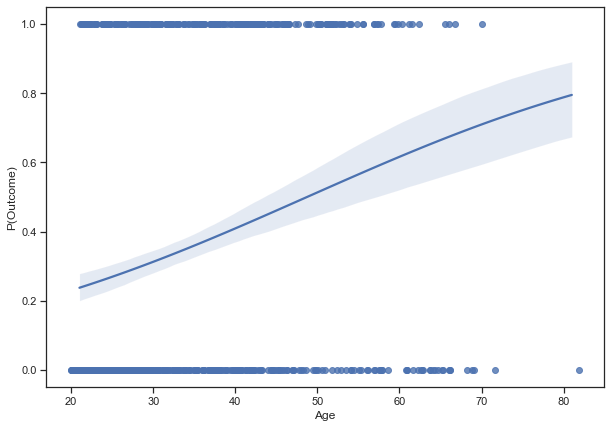

In [143]:
#Log_Reg_AGE = plt.scatter(diabetes.Age, diabetes.Outcome, marker='+',color='blue')
#plt.xlabel('Age')
#plt.ylabel('Outcome')

x = diabetes['Age']
y = diabetes['Outcome']

Log_Reg_AGE = sns.regplot(x=x,y=y,data=diabetes,logistic= True, x_jitter = True)
plt.ylabel('P(Outcome)')



In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes[['Age']],diabetes.Outcome,train_size=0.7)

In [145]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [146]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [147]:
model.score(X_test,y_test)  #Accuracy of the Model

0.6147186147186147

Our accuracy score is 61% it's not the best but we can change this by having more data and playing around with the size of the test train split. It could also be that Age is not a good predictor.

### We can also look at probabilities

In [148]:
X_test.head()

,Age
406,46
733,22
269,28
615,27
59,22


In [149]:
y_test.head()

406    1
733    0
269    1
615    0
59     0
Name: Outcome, dtype: int64

The number on the left shows us the probability that they won't have diabetes and the number on the right shows us they probability that the will:

In [151]:
model.predict_proba(X_test)

array([[0.53889468, 0.46110532],
       [0.76457483, 0.23542517],
       [0.71553463, 0.28446537],
       [0.72412241, 0.27587759],
       [0.76457483, 0.23542517],
       [0.70678778, 0.29321222],
       [0.76457483, 0.23542517],
       [0.70678778, 0.29321222],
       [0.76457483, 0.23542517],
       [0.73254784, 0.26745216],
       [0.60142399, 0.39857601],
       [0.65120168, 0.34879832],
       [0.54945735, 0.45054265],
       [0.74080805, 0.25919195],
       [0.75682341, 0.24317659],
       [0.47511693, 0.52488307],
       [0.71553463, 0.28446537],
       [0.4857464 , 0.5142536 ],
       [0.65120168, 0.34879832],
       [0.68883198, 0.31116802],
       [0.76457483, 0.23542517],
       [0.63161608, 0.36838392],
       [0.74890059, 0.25109941],
       [0.76457483, 0.23542517],
       [0.44340144, 0.55659856],
       [0.47511693, 0.52488307],
       [0.73254784, 0.26745216],
       [0.75682341, 0.24317659],
       [0.53889468, 0.46110532],
       [0.5176737 , 0.4823263 ],
       [0.

---

---

### Looking at Glucose as a predictor

Text(0, 0.5, 'P(Outcome)')

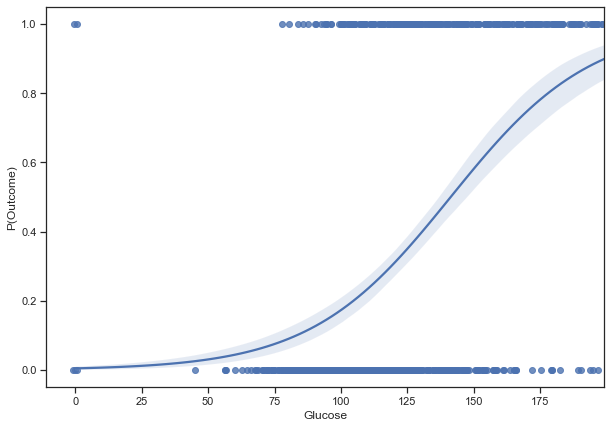

In [152]:
x = diabetes['Glucose']
y = diabetes['Outcome']

Log_Reg_GLUC = sns.regplot(x=x,y=y,data=diabetes,logistic= True, x_jitter = True)
plt.ylabel('P(Outcome)')

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes[['Glucose']],diabetes.Outcome,train_size=0.7)

model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [154]:
model.predict(X_test)  #What the model is predicting based on the training set

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [155]:
X_test.head()

,Glucose
479,132
764,122
417,144
79,112
666,145


In [156]:
y_test.head()

479    0
764    0
417    1
79     0
666    1
Name: Outcome, dtype: int64

#### We can look at probabilites

In [157]:
model.predict_proba(X_test)

array([[0.56494942, 0.43505058],
       [0.64709596, 0.35290404],
       [0.4618852 , 0.5381148 ],
       [0.72138115, 0.27861885],
       [0.45332183, 0.54667817],
       [0.11754486, 0.88245514],
       [0.49631364, 0.50368636],
       [0.79662822, 0.20337178],
       [0.84235746, 0.15764254],
       [0.78521962, 0.21478038],
       [0.47047113, 0.52952887],
       [0.74825605, 0.25174395],
       [0.71439381, 0.28560619],
       [0.18787938, 0.81212062],
       [0.29373614, 0.70626386],
       [0.20418483, 0.79581517],
       [0.31565774, 0.68434226],
       [0.76724863, 0.23275137],
       [0.75469941, 0.24530059],
       [0.77934355, 0.22065645],
       [0.80216085, 0.19783915],
       [0.37806251, 0.62193749],
       [0.86794262, 0.13205738],
       [0.48769044, 0.51230956],
       [0.76103052, 0.23896948],
       [0.75469941, 0.24530059],
       [0.89649833, 0.10350167],
       [0.80757932, 0.19242068],
       [0.59019734, 0.40980266],
       [0.52217585, 0.47782415],
       [0.

In [158]:
model.score(X_test,y_test)  #Accuracy of the Model

0.7792207792207793

We have a model score of 78% when we use Glucose as a predictor. Not bad, it's better than using Age.

---

---

### Looking at Insulin as a Predictor

Text(0, 0.5, 'P(Outcome)')

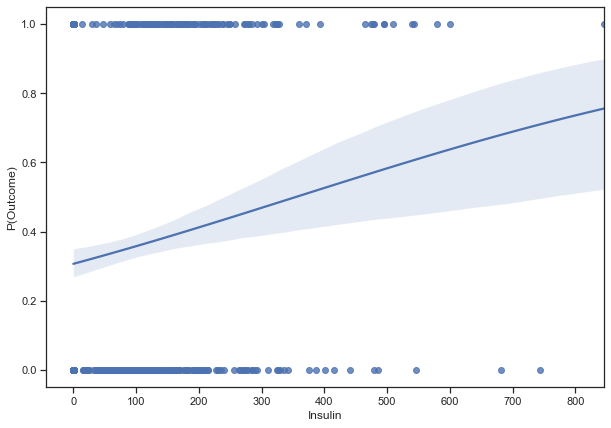

In [159]:
x = diabetes['Insulin']
y = diabetes['Outcome']

Log_Reg_INSUL = sns.regplot(x=x,y=y,data=diabetes,logistic= True, x_jitter = True)
plt.ylabel('P(Outcome)')

In [160]:
X_train, X_test, y_train, y_test = train_test_split(diabetes[['Insulin']],diabetes.Outcome,train_size=0.7)

model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [161]:
model.predict(X_test)  #What the model is predicting based on the training set

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### We can look at the probabilities

In [162]:
model.predict_proba(X_test)

array([[0.53754951, 0.46245049],
       [0.68323132, 0.31676868],
       [0.52911023, 0.47088977],
       [0.68323132, 0.31676868],
       [0.56784743, 0.43215257],
       [0.68323132, 0.31676868],
       [0.65080823, 0.34919177],
       [0.68323132, 0.31676868],
       [0.66256838, 0.33743162],
       [0.62123285, 0.37876715],
       [0.556935  , 0.443065  ],
       [0.68323132, 0.31676868],
       [0.68323132, 0.31676868],
       [0.61074438, 0.38925562],
       [0.68323132, 0.31676868],
       [0.68323132, 0.31676868],
       [0.68323132, 0.31676868],
       [0.68323132, 0.31676868],
       [0.68323132, 0.31676868],
       [0.56528532, 0.43471468],
       [0.63463847, 0.36536153],
       [0.58377338, 0.41622662],
       [0.68323132, 0.31676868],
       [0.58060104, 0.41939896],
       [0.68323132, 0.31676868],
       [0.62917821, 0.37082179],
       [0.68323132, 0.31676868],
       [0.68323132, 0.31676868],
       [0.63039452, 0.36960548],
       [0.59576303, 0.40423697],
       [0.

In [163]:
model.score(X_test,y_test)  #Accuracy of the Model

0.6883116883116883

the model score is 68% so the insulin variable is not very useful here. It actually performed worse than the Glucose logistic model

---

---

### Looking at Diabetes Pedigree Function as a Predictor

Text(0, 0.5, 'P(Outcome)')

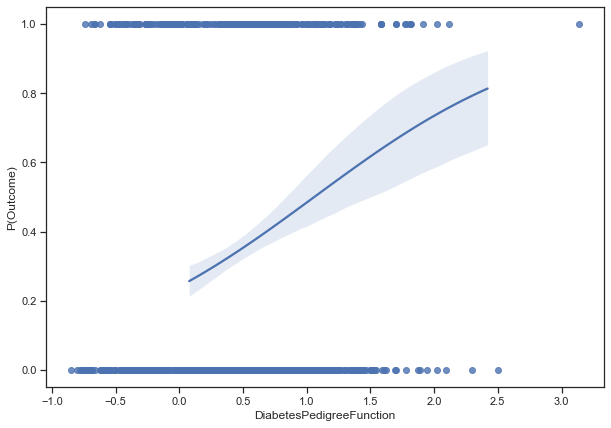

In [174]:
x = diabetes['DiabetesPedigreeFunction']
y = diabetes['Outcome']

Log_Reg_DPF = sns.regplot(x=x,y=y,data=diabetes,logistic= True, x_jitter = True, ci = 95)
plt.ylabel('P(Outcome)')

In [170]:
X_train, X_test, y_train, y_test = train_test_split(diabetes[['DiabetesPedigreeFunction']],diabetes.Outcome,train_size=0.7)

model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [171]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### We can look at the Probabilities

In [172]:
model.predict_proba(X_test)

array([[0.67749058, 0.32250942],
       [0.70762377, 0.29237623],
       [0.72844868, 0.27155132],
       [0.64975772, 0.35024228],
       [0.59843312, 0.40156688],
       [0.72804545, 0.27195455],
       [0.70168735, 0.29831265],
       [0.64440682, 0.35559318],
       [0.70126067, 0.29873933],
       [0.73265991, 0.26734009],
       [0.67032668, 0.32967332],
       [0.70720205, 0.29279795],
       [0.7023267 , 0.2976733 ],
       [0.54182251, 0.45817749],
       [0.70677996, 0.29322004],
       [0.67949068, 0.32050932],
       [0.59205155, 0.40794845],
       [0.64042839, 0.35957161],
       [0.68413193, 0.31586807],
       [0.66217179, 0.33782821],
       [0.71390663, 0.28609337],
       [0.69113407, 0.30886593],
       [0.61012585, 0.38987415],
       [0.51390094, 0.48609906],
       [0.6003901 , 0.3996099 ],
       [0.64464023, 0.35535977],
       [0.60283181, 0.39716819],
       [0.73584048, 0.26415952],
       [0.66965092, 0.33034908],
       [0.71804995, 0.28195005],
       [0.

In [175]:
model.score(X_test,y_test)

0.6493506493506493

65% Model Score